# CS295B F19: Homework 2
## The Laplace Mechanism and Differentially Private Contingency Tables

## Instructions

This assignment has three parts. The first part contains questions about the Laplace mechanism and composition in differential privacy. The second part asks you to apply the Laplace mechanism in several ways to obtain differentially private answers to queries over the `adult` dataset from Homework 1, and examines the accuracy of these answers. The third covers contingency tables.

Before you start, download the example dataset and ensure that all cells in this notebook execute without error. If you have trouble getting the notebook to run, please post a question on Piazza.

To ensure that the notebook runs, I've defined a function `your_code_here()` that simply returns the number `1`. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to `your_code_here()` in place or insert dummy values so that the cell does not throw an error when it runs.

Many of the questions in this assignment ask you to construct graphs. To help you arrive at the correct solution, I have left the graph plotted by my sample solution in the uploaded version of this notebook. You can refer to these example graphs by viewing the notebook on Github. If you re-run the cell after downloading the notebook, the graphs will disappear (because the notebook no longer contains the code that generated them). Your solutions should produce graphs similar to the ones in the uploaded notebook.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.

The point value of each question is listed with the question, and these add up to 150 points. The assignment is due by 5:00pm on Friday, September 27. When you have finished your assignment, submit it via Gradescope under the assignment "Homework 2." For questions on grading and submitting assignments, refer to the course webpage or email the instructor.

# BEGIN PREAMBLE ------------------------------------

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def your_code_here():
    return 1

# END PREAMBLE -------------------------------------

## Collaboration Statement

In the cell below, write your collaboration statement. This statement should describe all collaborations, even high-level ones (e.g. "I discussed my general approach for answering question 3 with Josh"). High-level collaborations of this kind are allowed as long as they are described; copying of answers or code is not allowed.

In [2]:
# In this cell (in markdown or a comment) write your collaboration statement

# Part 1: Laplace Mechanism & Composition

### Question 1 (10 points)
Graph the *empirical probability density function* of the Laplace Mechanism, for a counting query whose answer is `200.0`, at `epsilon` values of `10`, `1`, and `.5`. 

The *empirical probability density function* is the probability density of samples drawn from an underlying distribution. To graph this function for the Laplace Mechanism, draw 10,000 samples from the output distribution of your mechanism, and then graph the frequency of each output value (using a histogram).

*Hint*: use `plt.hist(..., bins=50)` three times to produce the three histograms, one on top of the other.

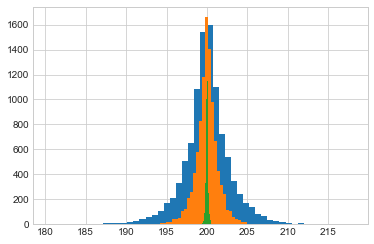

In [5]:
your_code_here()
None

### Question 2 (5 points)
In 2-5 sentences, answer the following:
- What do you observe about the emprical PDF of the Laplace Mechanism when `epsilon` changes?
- What effect does this observation have on privacy?

In [ ]:
# Write your answer to Question 2 here

### Question 3 (5 points)

Graph the empirical PDFs for your Laplace Mechanism running the same query on two hypothetical neighboring databases. Imagine that on one database, the query's true answer (i.e. with no noise added) is 200, while on its neighbor, the answer is 201. Use 10,000 samples to build the empirical PDF.

*Hint*: use `plt.hist(..., bins=50)` twice.

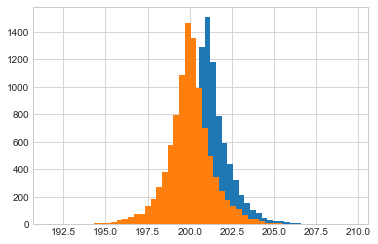

In [16]:
your_code_here()
None

### Question 4 (5 points)

In 2-5 sentences, answer the following:
- What do you observe about the way the two empirical PDFs overlap?
- What effect does the overlap have on privacy?

In [ ]:
# Write your answer to Question 4 here

### Question 5 (10 points)

Consider the definition of `mech2` below. Graph the empirical PDF of `mech2` for 10,000 samples and three values of `epsilon`: 10, 1, and 0.5.

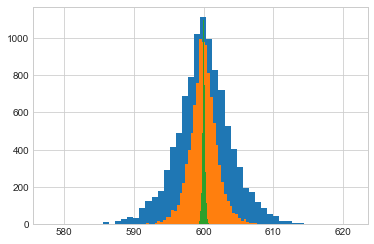

In [7]:
def mech2(epsilon):
    val1 = laplace_mech(200, 1, epsilon)
    val2 = laplace_mech(400, 1, epsilon)
    return val1 + val2

your_code_here()
None

### Question 6 (5 points)

In 3-6 sentences, answer the following:
- What is the privacy cost of `mech2`?
- Informally, why is this privacy cost correct?
- Is the shape of `mech2`'s empirical PDF similar to that of `laplace_mech`'s empirical PDF? What does this similarity or lack of similarity mean for privacy?

In [ ]:
# Write your answer to Question 6 here

### Question 7 (10 points)

Implement a mechanism `mech_n` that returns the average of `n` differentially private results for a single query.

*Hint*: use `laplace_mech` and `np.mean`.

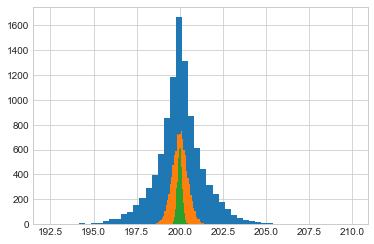

In [22]:
def mech_n(query, epsilon, n):
    return your_code_here()

vals1 = [mech_n(200, 1, 100) for v in range(10000)]
vals2 = [mech_n(200, 1, 10) for v in range(10000)]
vals3 = [mech_n(200, 1, 1) for v in range(10000)]
plt.hist(vals3, bins=50)
plt.hist(vals2, bins=50)
plt.hist(vals1, bins=50)
None

### Question 8 (5 points)

In 2-5 sentences, answer the following:
- What is the privacy cost of `mech_n`?
- Informally, why is this privacy cost correct?

In [ ]:
# Write your answer to Question 8 here

# Part 2: Analyzing Real Data

Next we'll examine the effect of differential privacy on some queries over the `adult` dataset that we used for Homework 1. First, we'll read in the data.

In [9]:
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Question 9 (10 points)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the 0th element of the `shape` of the filtered dataframe.

*Hint*: if you have not used Pandas before, [this](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) comparison with SQL might be useful.

In [10]:
query1 = your_code_here()
query1

10683

### Question 10 (5 points)

In 2-5 sentences, answer the following:
- What is the sensitivity of the query in the last question, and why?

In [ ]:
# Write your answer to Question 10 here

### Question 11 (10 points)

Use your implementation of `laplace_mech` to produce a differentially private answer to your query from the last question, with `epsilon = 0.1`.

In [11]:
your_code_here()

10683.322660193706

### Question 12 (10 points)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Using your answer to the last question, write code to produce 1000 differentially private answers to the marital status query, with `epsilon = 0.1`. Calculate the percent error for each one of these answers against the original (non-private) answer. Then, graph the distribution of errors using a histogram.

*Hint*: use `plt.hist(..., bins=20)`.

In [12]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

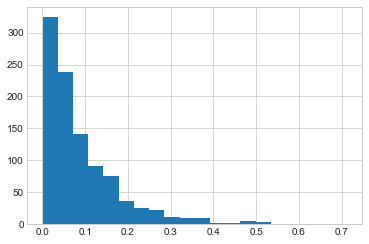

In [13]:
your_code_here()
None

# Part 3: Contingency Tables

### Question 13 (5 points)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [5]:
your_code_here()

[('Never-married', 10683),
 ('Married-civ-spouse', 14976),
 ('Divorced', 4443),
 ('Married-spouse-absent', 418),
 ('Separated', 1025),
 ('Married-AF-spouse', 23),
 ('Widowed', 993)]

### Question 14 (5 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech` above.

In [6]:
your_code_here()

[10682.848133030631,
 14975.60827661935,
 4442.7245091621635,
 418.2616957502663,
 1023.7894863922751,
 23.57232758313454,
 994.1643751413036]

### Question 15 (5 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

### Question 16 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

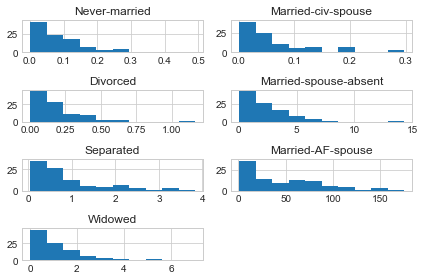

In [7]:
fig = plt.figure()

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_vals = [your_code_here()]
    errors = [your_code_here() for x in orig_vals]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 17 (5 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

### Question 18 (5 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [8]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 19 (5 points)

Write code to build a differentially private version of your result from the last question.

*Hint*: use `applymap`.

In [9]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,2659.175352,1771.532110
Married-AF-spouse,7.969552,2.082040
Married-civ-spouse,1668.723064,13324.034589
Married-spouse-absent,195.161060,200.521187
Never-married,4744.826173,5923.385789
Separated,634.089266,402.282779
Widowed,821.479054,155.896472


### Question 20 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

*Hint*: use `applymap` and `pct_error` on your answer to the last question.

In [10]:
your_code_here()

Sex,Female,Male
Martial Status,,
Divorced,0.385063,0.061563
Married-AF-spouse,268.785429,138.392969
Married-civ-spouse,0.473652,0.016846
Married-spouse-absent,1.124842,3.909711
Never-married,0.391771,0.100711
Separated,3.786709,7.463570
Widowed,0.702595,5.519372


### Question 21 (5 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to the last question?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

### Question 22 (10 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [11]:
tabs = your_code_here()
display(tabs)
errors = your_code_here()
display(errors)

Education                     10th  11th  12th  1st-4th  5th-6th  7th-8th  \
Martial Status        Sex                                                   
Divorced              Female    67    79    17        5       10       33   
                      Male      53    51    22        5       10       40   
Married-AF-spouse     Female     0     0     0        0        0        0   
                      Male       0     0     0        0        0        0   
Married-civ-spouse    Female    33    35    20        6       18       23   
                      Male     316   319   110       75      154      336   
Married-spouse-absent Female     7     7     4        3        5        6   
                      Male       8    12     4        9       15        8   
Never-married         Female   128   248    84       12       29       34   
                      Male     233   338   148       27       60       79   
Separated             Female    31    28    12        5       11       13   
                      Male      18    20     2        4        7       10   
Widowed               Female    29    35     7       15       11       51   
                      Male      10     3     3        2        3       13   

Education                     9th  Assoc-acdm  Assoc-voc  Bachelors  \
Martial Status        Sex                                             
Divorced              Female   35         136        153        295   
                      Male     29          67         81        251   
Married-AF-spouse     Female    0           2          0          2   
                      Male      0           0          1          2   
Married-civ-spouse    Female   22          77         93        311   
                      Male    208         383        596       2457   
Married-spouse-absent Female    3           8          8         32   
                      Male      6           4          5         36   
Never-married         Female   50         161        178        869   
                      Male    105         176        184        926   
Separated             Female   17          16         29         46   
                      Male     16          14         13         46   
Widowed               Female   17          21         39         64   
                      Male      6           2          2         18   

Education                     Doctorate  HS-grad  Masters  Preschool  \
Martial Status        Sex                                              
Divorced              Female         20      937      153          0   
                      Male           13      676       80          1   
Married-AF-spouse     Female          0        8        0          0   
                      Male            0        5        0          0   
Married-civ-spouse    Female         20      533      113          3   
                      Male          266     4312      890         17   
Married-spouse-absent Female          3       63        9          0   
                      Male            4       58        8          4   
Never-married         Female         35     1235      216         10   
                      Male           38     1854      188         12   
Separated             Female          4      270       14          1   
                      Male            3      136       11          0   
Widowed               Female          4      344       31          2   
                      Male            3       70       10          1   

Education                     Prof-school  Some-college  
Martial Status        Sex                                
Divorced              Female           21           711  
                      Male             34           358  
Married-AF-spouse     Female            0             2  
                      Male              0             1  
Married-civ-spouse    Female           27           323  
                      Male            385          2495  
Married-spous

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


Education                           10th        11th        12th     1st-4th  \
Martial Status        Sex                                                      
Divorced              Female   13.212250    1.001492   14.392196  275.921447   
                      Male     18.766641    2.079362   40.706440  112.623169   
Married-AF-spouse     Female         inf         inf         inf         inf   
                      Male           inf         inf         inf         inf   
Married-civ-spouse    Female    5.105888   19.628118    9.276198  428.894535   
                      Male      1.622086    5.295529   21.831492   14.076637   
Married-spouse-absent Female   43.646362  580.897323  187.453473  143.218795   
                      Male     44.415604  251.251476  140.712503   37.658559   
Never-married         Female    3.269510   17.190364    7.124826    1.873453   
                      Male      2.358102    0.756349    4.891128   30.539178   
Separated             Female   11.012273   11.494234   99.501676  150.809126   
                      Male      3.140967   83.362882  559.138245  418.665421   
Widowed               Female   43.143319   44.731092   17.475232   12.325825   
                      Male    219.892637    2.818432  765.437869  939.010183   

Education                        5th-6th     7th-8th         9th  Assoc-acdm  \
Martial Status        Sex                                                      
Divorced              Female  158.696238   83.152448    9.519977   10.704262   
                      Male     32.454853    0.333750   14.173417   50.952313   
Married-AF-spouse     Female         inf         inf         inf   41.593735   
                      Male           inf         inf         inf         inf   
Married-civ-spouse    Female   23.156721   24.257070   15.456943   10.806136   
                      Male      0.944219    1.526570    7.794761    0.066418   
Married-spouse-absent Female   60.228727  195.677127  524.319194  110.528392   
                      Male     40.991643   97.631076  487.243235  138.441201   
Never-married         Female    4.677946   34.635716    1.920155    1.298829   
                      Male      1.745534    5.540590    1.608987    6.842197   
Separated             Female   12.344328   48.449786  148.928963   93.292525   
                      Male     79.363825  370.101591   29.172363  104.036918   
Widowed               Female   66.587501   13.069210   62.219640   25.623335   
                      Male     12.647432  237.687521  110.103167  382.343947   

Education                       Assoc-voc   Bachelors   Doctorate     HS-grad  \
Martial Status        Sex                                                       
Divorced              Female     9.859469    1.414352   46.872983    0.544858   
                      Male      18.713384   10.525381   13.887566    2.057109   
Married-AF-spouse     Female          inf  651.825947         inf  214.311877   
                      Male     134.699912  214.667924         inf   45.947736   
Married-civ-spouse    Female     0.531959    7.223208  120.475378    3.338190   
                      Male       3.965224    0.092581    5.486646    0.017470   
Married-spouse-absent Female    17.068730   21.589350   15.799091   32.226495   
                      Male      17.146672   14.533779  555.865629   22.689274   
Never-married         Female     4.230996    0.170761   14.592579    0.834173   
                      Male       0.850513    1.478157   39.929357    0.744797   
Separated             Female     5.553680   35.318247  324.360993    2.781989   
                      Male       0.543054   46.389483  414.220678    8.296518   
Widowed               Female     7.353236    2.618950  703.387420    0.726989   
                      Male    1231.612109  173.638338  520.826024   19.250483   

Education                        Masters    Preschool  Prof-school  \
Martial Status        Sex                                            
D

### Question 23 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in the last question? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in the last question different from the privacy cost in Question 19? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?